In [1]:
from src.hartree_fock_library import HartreeFock,HartreeFockVariational
from src.hamiltonian_utils import get_twobody_nuclearshell_model,FermiHubbardHamiltonian,SingleParticleState
import numpy as np
import torch
from typing import Dict,List
#from src.qml_models import AdaptVQEFermiHubbard
from src.qml_utils.train import Fit
from src.qml_utils.utils import configuration
from src.qml_models import AdaptVQEFermiHubbard
import matplotlib.pyplot as plt
from adapt_vqe_old import AdaptVQEFermiHubbard

In [2]:
class SpinConservation():
    
    def __init__(self,size:int):
        
        self.size=size

    def spin_conservation(self,idxs:List):

        l=len(idxs)

        total_initial_spin=0.
        for idx in idxs[:l//2]:
            
            if idx < self.size:
                total_initial_spin+=1
                
        total_final_spin=0.
        for idx in idxs[l//2:]:
            
            if idx < self.size:
                total_final_spin+=1
        return total_initial_spin==total_final_spin
    
    def local_interaction(self,idxs:List):
        
        condition=idxs[0]==idxs[-1] and idxs[1]==idxs[-2] and idxs[0]+self.size==idxs[1]
        
        return condition

In [3]:
size_a=6
size_b=6
FHHamiltonian=FermiHubbardHamiltonian(size_a=size_a,size_b=size_a,nparticles_a=2,nparticles_b=2)

u=8.
t=1.
v_ext=np.random.uniform(size=size_a)

# define the local onsite potential
twobody_matrix:Dict={}
for i in range(size_a):
    twobody_matrix[(i,i+size_a,i+size_a,i)]=u
    twobody_matrix[(i, i + size_a, i, i + size_a)] = -u
    twobody_matrix[( i + size_a,i , i + size_a,i)] = -u
    twobody_matrix[(i+size_a, i , i , i+size_a)] = u

kinetic_term:Dict={}
adj_matrix=np.zeros((size_a+size_b,size_a+size_b))
for i in range(size_a):
    kinetic_term[(i,(i+1) % size_a)]=t
    kinetic_term[(size_a +i,size_a+(i+1) % size_a)]=t
    adj_matrix[i,(i+1)%size_a]=t
    adj_matrix[(i + 1) % size_a,i]=t
    adj_matrix[i,i]=-2*t
    adj_matrix[i+size_a,i+size_a]=-2*t
    adj_matrix[i+size_a,size_a+ (i + 1) % size_a] = t
    adj_matrix[size_a+(i + 1) % size_a,size_a+ i] = t


print(adj_matrix-adj_matrix.T)
# %%

FHHamiltonian.get_external_potential(external_potential=np.append(v_ext,v_ext))
FHHamiltonian.get_kinetic_operator(adj_matrix=kinetic_term)
FHHamiltonian.get_twobody_interaction(twobody_dict=twobody_matrix)
FHHamiltonian.get_hamiltonian()

# print(FHHamiltonian.hamiltonian)
print(FHHamiltonian.hamiltonian)
# print(FHHamiltonian.twobody_operator)
# print(FHHamiltonian.kinetic_operator+FHHamiltonian.twobody_operator-FHHamiltonian.hamiltonian)
egs,psi0=FHHamiltonian.get_spectrum(n_states=1)

print(egs)


# # %% define the fit class

# HFFit = FitHartreeFock(learning_rate=0.1, epochs=200)

# history_hf = HFFit.run(HFE)
# # %%
# psi_hf = HFE.get_psi().detach().numpy()

# print(psi_hf.conjugate().transpose().dot(FHHamiltonian.hamiltonian.dot(psi_hf)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
  (0, 0)	-12.658453154059412
  (0, 1)	1.0
  (0, 8)	-1.0
  (0, 15)	1.0
  (0, 120)	-1.0
  (1, 0)	1.0
  (1, 1)	-4.748370416346726
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 11)	-1.0
  (1, 16)	1.0
  (1, 121)	-1.0
  (2, 1)	1.0
  (2, 2)	-5.478281496585054
  (2, 3)	1.0
  (2, 6)	1.0
  (2, 13)	-1.0
  (2, 17)	1.0
  (2, 122)	-1.0
  (3, 2)	1.0
  (3, 3)	-5.367177073655404
  (3, 4)	1.0
  (3, 7)	1.0
  (3, 14)	-1.0
  (3, 18)	1.0
  :	:
  (220, 222)	1.0
  (221, 56)	-1.0
  (221, 206)	1.0
  (221, 211)	-1.0
  (221, 218)	1.0
  (221, 220)	1.0
  (221, 221)	-5.

In [4]:
# %% Hartree fock initialization

HFclass = HartreeFock(size=size_a, nspecies=2)

HFclass.get_hamiltonian(twobody_interaction=twobody_matrix, kinetic_term=adj_matrix,external_potential=np.append(v_ext,v_ext))

de, history_herm, ortho_history = HFclass.selfconsistent_computation(eta=1, epochs=50)

de=0.000000000000001: 100%|██████████| 50/50 [00:00<00:00, 534.29it/s]


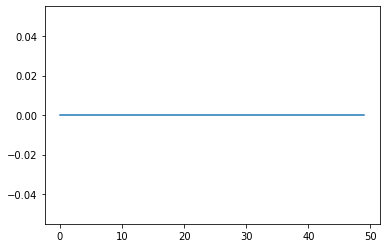

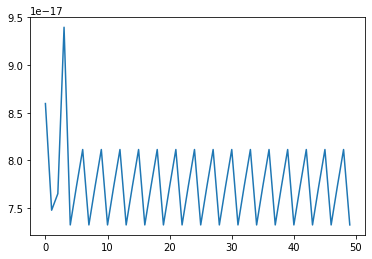

-29.001875448101607


In [5]:
plt.plot(history_herm)
plt.show()

plt.plot(ortho_history)
plt.show()

energy = HFclass.compute_energy()

print(energy)

0.9999999999999999
-0.19750396785674124


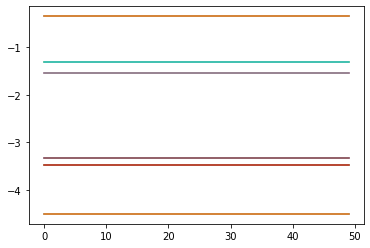

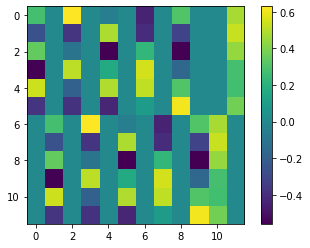

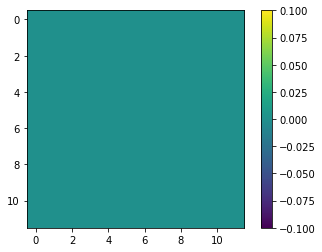

In [6]:
print(np.linalg.norm(HFclass.weights[:, 0]))
print(np.sum(HFclass.weights[0, :].conj() * HFclass.weights[:, 1]))

plt.plot(de)

# plt.semilogy()
# plt.ylim([0,0.001])
plt.show()

plt.imshow(np.real(HFclass.weights))
plt.colorbar()
plt.show()
plt.imshow(np.imag(HFclass.weights))
plt.colorbar()
plt.show()


In [7]:
psi_hf=HFclass.create_hf_psi(FHHamiltonian.basis,nparticles=4)
print(psi_hf.conjugate().transpose() @ FHHamiltonian.hamiltonian @ psi_hf)

-10.3372075735995


In [10]:
# %% Hartree fock initialization

HFclass = HartreeFockVariational(size=size_a, nspecies=2, mu=1)


HFclass.get_hamiltonian(
    twobody_interaction=twobody_matrix,kinetic_term=torch.from_numpy(adj_matrix), external_potential=torch.from_numpy(np.append(v_ext,v_ext))
)

de, history_herm, ortho_history = HFclass.train(epochs=1000, eta=0.01)

energy=-43.343898773193359+0.000000000000000j, norm constrain=0.426617741584778: 100%|██████████| 1000/1000 [00:03<00:00, 296.26it/s]


[0.99999994 0.99999994 0.99999994 1.         0.99999994 1.
 1.         0.99999994 0.99999994 0.99999994 1.         1.        ]
(-1+0j)


/opt/anaconda3/envs/dft_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


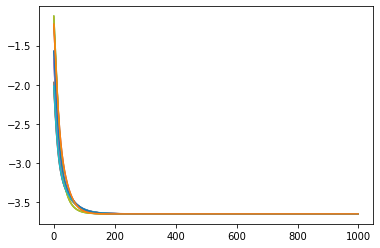

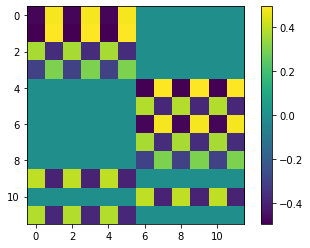

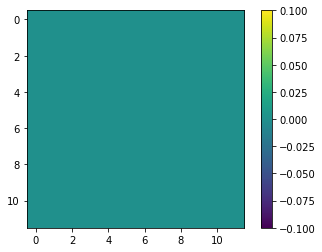

2.499511064929936


/home/ecosta/Quantum-Machine-Learning-on-Fermions/src/hartree_fock_library.py:362: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[i] = coeff


In [12]:

psi=HFclass.compute_psi()
print(np.linalg.norm(psi, axis=0))
print(np.sum(psi[:, 0].conj() * psi[:, 1]))



plt.plot(de)
# plt.semilogy()
# plt.ylim([0,0.001])
plt.show()

plt.imshow(np.real(psi))
plt.colorbar()
plt.show()
plt.imshow(np.imag(psi))
plt.colorbar()
plt.show()

psi_hf = HFclass.create_hf_psi(FHHamiltonian.basis, nparticles=4)
print(psi_hf.conjugate().transpose() @ FHHamiltonian.hamiltonian @ psi_hf)

In [19]:
# old initialization works better than Hartree Fock
min=10000
for i,b in enumerate(FHHamiltonian.basis):
    psi=np.zeros(FHHamiltonian.basis.shape[0])
    psi[i]=1.    
    value= np.conj(psi) @ FHHamiltonian.hamiltonian @ psi
    if value<min:
        min=value
        print(value)
        print(b)
        psi_hf=psi
# idxs=np.random.randint(0,FHHamiltonian.basis.shape[0],size=3)
# psi_hf=np.zeros(FHHamiltonian.basis.shape[0])
# psi_hf [idxs]=1/np.sqrt(3)


# for i, b in enumerate(FHHamiltonian.basis):
#     psi = np.zeros(FHHamiltonian.basis.shape[0])
#     psi[i] = 1.0
#     value = np.conj(psi) @ FHHamiltonian.hamiltonian @ psi
#     if value == min:
#         min = value
#         print(value)
#         print(b)
#         psi_hf[i] = psi[i]
        
# psi_hf=psi_hf/np.linalg.norm(psi_hf)

-0.7989055744753077
[1 1 0 0 0 0 1 1 0 0 0 0]
-0.8907696563439194
[1 0 0 1 0 0 1 0 0 1 0 0]
-1.4774204863407363
[0 1 0 1 0 0 0 1 0 1 0 0]


In [20]:
spinconservation=SpinConservation(size=size_a)
operator_pool:Dict={}

operator_pool=FHHamiltonian.set_operator_pool(operator_pool=operator_pool,conditions=[spinconservation.spin_conservation],nbody='two')
operator_pool=FHHamiltonian.set_operator_pool(operator_pool=operator_pool,conditions=[spinconservation.spin_conservation],nbody='one')
#%%
print('number of operators=',len(list(operator_pool.keys())))

# %%
random=False

model=AdaptVQEFermiHubbard()

model.set_hamiltonian(FHHamiltonian.hamiltonian)
model.set_reference_psi(psi_hf)

model.set_operators_pool(operator_pool=operator_pool,random=random)

#%%


fit=Fit(method='BFGS',tolerance_opt=10**-7,e_ref=egs)

fit.configuration_checkpoint=configuration
fit.init_model(model)

#%%
history,grad_history=fit.run()
# # %%
print(model.operator_action_info)
print(model.energy-egs/egs)

number of operators= 2220


AttributeError: 'AdaptVQEFermiHubbard' object has no attribute 'set_hamiltonian'

In [ ]:
spinconservation=SpinConservation(size=size_a)
operator_pool:Dict={}

operator_pool=FHHamiltonian.set_operator_pool(operator_pool=operator_pool,conditions=[spinconservation.spin_conservation],nbody='two')
operator_pool = FHHamiltonian.set_operator_pool(
    operator_pool=operator_pool,
    conditions=[spinconservation.spin_conservation],
    nbody="one",
)

AdVQE=AdaptVQEFermiHubbard()


AdVQE.set_system(hamiltonian=FHHamiltonian.hamiltonian,psi0=psi_hf,operator_pool=operator_pool)

AdVQE.set_hyperparameters(learning_rate=0.1,tolerance=10**-6)

AdVQE.optimization()

In [12]:
AdVQE.operator_action_info

[(8, 9, 8, 10),
 (8, 15),
 (8, 14),
 (8, 10),
 (9, 11),
 (13, 15),
 (8, 12),
 (10, 14),
 (10, 13),
 (9, 12),
 (11, 14),
 (10, 15),
 (8, 9),
 (12, 15),
 (9, 10),
 (12, 14)]

In [11]:
rel_error=[np.abs((e_min-egs)/egs) for e_min in history]

plt.figure(figsize=(10,10))
plt.plot(rel_error,linewidth=5)
plt.xlabel('epochs',fontsize=40)
plt.semilogy()
plt.ylabel(r'$\Delta_r e$',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.show()


plt.figure(figsize=(10,10))
plt.plot(grad_history,linewidth=5)
plt.xlabel('epochs',fontsize=40)
plt.semilogy()
plt.ylabel(r'grad',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.show()


NameError: name 'history' is not defined